## Laboration - Sweet & Conquer

**[Top Secret] Intelligence Briefing**


Mayday! Mayday! 

One of the farmers of Fire Nation, whilst on a trip abroad to the neighbouring Earth Kingdom, was bored and apparently threw an apple at a local peasant. 

Now, 24h hours later, the world is at war.

The conflict first involved only Fire Nation & the Earth Kingdom - but the Water Tribe and the Air Nomads swiftly decided to join in as well (for some random reason). 

Rumour is that they also wanted to join in on the apple free-for-all fiesta.


**Main objective**

Evidently, to win 'the apple wars', the goal of each faction is to steal all fruits from the others.

Our objective is to simulate the dynamics of this little... dispute. 


**Grading criteria & general instructions**

In general, grading will be based on the code in it's entirety. Extra weight will be put on readability, so think carefully about proper variable usage, method naming & docstrings and supplemental comments. 

Importantly, also make sure to implement type hints wherever applicable!

The tasks are categorized into difficulty tiers. To pass the lab (betyg G), you only need to work on the tasks designated with * (1 star) and completing most of them in a satisfactory manner. 

Succesfully completing the tasks marked with ** (two stars), and making atleast some progress on the one marked with *** (3 stars) ears your the higher grade (betyg VG).

There is another task, marked with BONUS. That one has no impact on the grading, but adds a fun dynamic to the simulation. It requires the task marked with *** to tbe completed first.



## Tasks

Here's the boilerplate (starter code) for a class called Faction that you'll be working on. The instances of this class will represent the different competing factions.

In [67]:
import matplotlib.pyplot as plt
import random as rnd
import time

class Faction:
    
    """
    This class stores information about the different factions in this game
    
    * Attributes:

        name(str)                           : the name of the faction
        apples(int)                         : amount of apples currently controlled (range: 0-200)
        oranges(int)                        : amount of oranges currently controlled (range: 0-200)
        bananas(int)                        : amount of bananas currently controlled (range: 0-200)
        strawberries(int)                   : amount of strawberries currently controlled (range: 0-200)

    * Public methods:
    
        .status() -> None                   : prints flavor text dependent on the total stocks of fruit.
        .inventory() -> int                 : returns the total amount of fruits the faction currently possess
        .visualize_resources() -> None      : shows a bar chart of the faction's fruit stocks
        .organical_growth() -> None         : randomly increases the amount of a fruit and prints the result
        .__mul__() -> None                  : defines multiplication of instances as attacks between factions
        .trade_offer() -> None              : simulates trade between factions

    * Internal methods:
    
        ._fruits_as_dict() -> dict[str:int] : returns a dictionary version of the instance's fruits
        ._adjectives() -> str               : returns a positive, neutral or negative adjective (string)
        ._possessive_form() -> str          : returns a possessive form of a faction name (string)
        .__repr__() -> str                  : returns an unambiguous string version of the instance
    """ 
    
    def __init__(self, name: str, apples: int, oranges: int, bananas: int, strawberries: int) -> None:
        
        """
        Initializes an instance of the class Faction with the given attributes.
        """
        
        self.name = name
        self.apples = apples
        self.oranges = oranges
        self.bananas = bananas
        self.strawberries = strawberries

    ################
    #  PROPERTIES  #
    ################
     
    @property
    def name(self) -> str:
        return self._name
    @name.setter
    def name(self, value: str) -> None:
        if not isinstance(value, str):                                                          
            raise TypeError ('Attribute "name" must be a string.')
        
        else:
            self._name = value

    @property
    def apples(self) -> int:
        return self._apples
    @apples.setter
    def apples(self, value: int) -> None:
        if not isinstance(value, int):
            raise TypeError ('Attribute "apples" must be an integer.')
        
        elif not 0 <= value <= 200:
            raise ValueError ('Value of "apples" must be between 0 and 200 inclusive.')
        
        else:
            self._apples = value
            
    @property
    def oranges(self) -> int:
        return self._oranges
    @oranges.setter
    def oranges(self, value: int) -> None:
        if not isinstance(value, int):
            raise TypeError ('Attribute "oranges" must be an integer.')
        
        elif not 0 <= value <= 200:
            raise ValueError ('Value of "oranges" must be between 0 and 200 inclusive.')
        
        else:
            self._oranges = value
    
    @property
    def bananas(self) -> int:
        return self._bananas
    @bananas.setter
    def bananas(self, value: int) -> None:
        if not isinstance(value, int):
            raise TypeError ('Attribute "bananas" must be an integer.')
        
        elif not 0 <= value <= 200:
            raise ValueError ('Value of "bananas" must be between 0 and 200 inclusive.')
        
        else:
            self._bananas = value
        
    @property
    def strawberries(self) -> int:
        return self._strawberries
    @strawberries.setter
    def strawberries(self, value: int) -> None:
        if not isinstance(value, int):
            raise TypeError ('Attribute "strawberries" must be an integer.')
        
        elif not 0 <= value <= 200:
            raise ValueError ('Value of "strawberries" must be between 0 and 200 inclusive.')
        
        else:
            self._strawberries = value
            
        
    ###########
    # METHODS #
    ###########

    def inventory(self) -> int:
        
        """
        Returns the total amount of fruits (i.e. all fruits) the faction currently possess
        """
        
        return self.apples + self.oranges + self.bananas + self.strawberries


    def status(self) -> None:
        
        """
        Calls on the method .inventory() to count the total number of fruits (apples, oranges, bananas and strawberries) in the instance
        and then prints different flavor text depending on the total number of fruits.
        """
        
        total = self.inventory()
    
        if total <= 150:
            print(f'This aint nothin but a scratch! {self.name} might be struggling for the moment, but will be back with vengance!')
        
        elif 150 < total <= 500:
            print(f'The proud {self.name} is VERY eager to toss some oranges! Where are the opponents?!')
            
        elif 500 < total:
                print(f'{self.name} is GODLIKE! Their position is super dominant!')


    def visualize_resources(self) -> None:
        
        """
        Generates bar charts to visualize the amount of different fruit the current instance possesses.
        """
        
        # Prepare lists of values to be rendered as bar chart
        number_of_fruits = [self.apples, self.oranges, self.bananas, self.strawberries]
        names_of_fruits = ['Apples', 'Oranges', 'Bananas', 'Strawberries']
        
        # Generate list of colors for the bars
        colors_of_bars = []
        for number in number_of_fruits:
            if 0 <= number <= 50: colors_of_bars.append('crimson')
            elif 50 < number < 100: colors_of_bars.append('coral')
            else: colors_of_bars.append('seagreen')
        
        # Render the bar chart
        plt.title(f'The {self._adjectives(1)} {self.name}')
        plt.ylim(0, 200)
        bars = plt.bar(names_of_fruits, number_of_fruits, color=colors_of_bars)     # Osäker på om detta är "rätt" sätt
        plt.bar_label(bars)                                                         
        plt.xlabel('Fruits')
        plt.ylabel('Stocks')
        plt.show()
        

    def organical_growth(self) -> None:
        
        """
        Adds a random amount (1-5) to a random fruit in the instance.
        Respects the maximum amount: 200.
        Prints suitable flavor text.
        """

        # Get fruit attributes as a temporary dictionary (fruit: amount) to make distribution of fruits easier
        fruits = self._fruits_as_dict()
        
        # Choose fruit and amount of fruit at random
        choice = rnd.choice(list(fruits.keys()))
        num_of_fruits = rnd.randint(1,5)
        
        # Add amount to fruit stock, if it does not, nor will not, exceed 200
        # and print suitable flavor text
        if fruits[choice] == 200:
            print(f'Glorious {self.name} is already at maximum capacity for {choice}!')
            
        elif fruits[choice] + num_of_fruits > 200:
            fruits[choice] = 200
            print(f'Glorious {self.name} has harvested {num_of_fruits} {choice}, to a new maximum total of 200!')
            
        else:
            fruits[choice] += num_of_fruits
            new_total = fruits[choice]      
            print(f'Glorious {self.name} has harvested {num_of_fruits} {choice}, to a new total of {new_total}!')
            
        # Pass the values from the temporary dictionary back into the instance's attributes
        self.apples = fruits['apples']
        self.oranges = fruits['oranges']
        self.bananas = fruits['bananas']
        self.strawberries = fruits['strawberries']


    def __mul__(self, other) -> None:
        
        """
        Defines multiplication of instances of this class as attacks between different instances of the class.
        """
        
        # First, check to see if defender has any resources left using the .inventory()-method
        if other.inventory() == 0:
            print(f'The {other.name} is already in ruins, leave them alone and choose another faction to attack!')
            
        else:
            print(f'The {self._adjectives(1)} {self.name} launches an attack against the {self._adjectives(-1)} {other.name}!')
            time.sleep(2)

            # See if attack is successful
            attack_roll = rnd.randint(1,10)
            
            # * Attack succeeds *
            if attack_roll <= 7:

                # Create some fun flavor text depending on the attack roll

                if 1 <= attack_roll <= 3:
                    win_text = f'easily crushes the {self._adjectives(-1)}'

                elif 4 <= attack_roll <=  6:
                    win_text = f'defeats the {self._adjectives(0)}'

                else:
                    win_text = f'just barely ekes out a victory against the {self._adjectives(1)}'

                # Generate list of looted amounts of fruit (20% of each fruit, rounded to a whole number and cast as int) 
                loot = [int(round(other.apples * 0.2)), 
                        int(round(other.oranges * 0.2)), 
                        int(round(other.bananas * 0.2)), 
                        int(round(other.strawberries * 0.2))]

                # Double loot in case of critical win and create flavor text
                if rnd.randint(1, 10) == 1: # Roll for critical win
                    loot = [amount * 2 for amount in loot]
                    win_text = f'humiliates the ill-fated and ill-prepared'
                
                # Print the winning conditions in flavor text
                print(f'The {self.name} {win_text} {other.name}!')
                time.sleep(2)
                

                # * Distribute loot *
                fruits = self._fruits_as_dict() # Get fruit attributes as a dictionary, using the internal method _fruits_as_dict()
                empty = [] # List of stocks that are empty
                extra_loot = {} # Dictionary of bonus fruits
                # loot[] is generated above
                
                for i, fruit in enumerate(fruits.keys()):         # Loop through the dictionary of fruits
                    stocks = getattr(other, fruit)                # Store the amount of the current fruit in the defending instance
                    
                    if loot[i] > stocks:                          # If the looted amount exceeds the stocks of the current fruit
                        setattr(other, fruit, 0)                  # Set the amount of current fruit in the defending instance to 0
                        empty.append(fruit)                       # Add the fruit to the list of emptied stocks
                        
                    if stocks - loot[i] <= 5:                     # If the looted fruit brings the amount of the current fruit to or below 5
                        setattr(other, fruit, 0)                  # Set the amount of current fruit in the defending instance to 0
                        bonus = (stocks - loot[i])                # Store the amount of extra fruit
                        empty.append(fruit)                       # Add the fruit to the list of emptied stocks
                        extra_loot.update({fruit: bonus})         # Add the bonus fruits to the dictionary of bonus fruits
                        loot[i] += bonus                          # Increase the amount looted by the bonus amount
                        
                    else:
                        setattr(other, fruit, (stocks - loot[i])) # Decrease the amount of the current fruit in the defending instance
                        
                # Print flavor text in case any of the defender's stocks are emptied
                if len(empty) > 0: # empty[] is generated in the section above
                    
                    if len(empty) == 1:
                        print(f'The {other.name} are out of {empty[0]}.')
                        
                    else:
                        print(f'The poor {self._possessive_form(other.name)} stocks of', end=' ')
                        
                        for item in empty[:-2]:
                            print(item, end=', ')
                        
                        print(f'{empty[-2]} and {empty[-1]} are obliterated!')
                        
                        if other.inventory() == 0:
                            print(f'The {self._adjectives(-1)} {other.name} are defeated...')
                            
                    if len(extra_loot.keys()) > 0:
                        
                        if len(extra_loot.keys()) == 1:
                            (single_fruit, single_value), = extra_loot.items()
                            print(f'Some additional {single_fruit} {single_value} were plundered.')
                            
                # Give loot to the winners
                print(f"""
                      To the winners go the spoils:
                      * {loot[0]} apples
                      * {loot[1]} oranges
                      * {loot[2]} bananas and
                      * {loot[3]} strawberries
                      """)
                
                full = [] # List of stocks that are full
                
                # Check whether stocks are, or will be full
                for i, fruit in enumerate(fruits):
                    
                    if fruits[fruit] == 200:
                        full.append(fruit)
                        
                    elif fruits[fruit] + loot[i] >= 200:
                        fruits[fruit] = 200
                        full.append(fruit)
                        
                    else:
                        fruits[fruit] += loot[i]
                        
                # Print flavor text in case the amount of any fruit exceeds 200
                if len(full) > 0: # full[] is generated in the section above
                    
                    if len(full) == 1:
                        print(f"The {self._possessive_form(self.name)} stocks of {full[0]} are full.")
                        
                    else:
                        print(f'Fortune smiles upon the {self.name} and their stocks overflow with', end=' ')
                        
                        for item in full[:-2]:
                            print(item, end=', ')
                            
                        print(f'{full[-2]} and {full[-1]}!')
            
                # Pass the values from the temporary dictionary back into the instance's attributes
                self.apples = fruits['apples']
                self.oranges = fruits['oranges']
                self.bananas = fruits['bananas']
                self.strawberries = fruits['strawberries']
                            
            # ** Attack fails **
            else:
                print(f'The {self._adjectives(1)} {other.name} bravely defend themselves against the {self._adjectives(-1)} {self.name}.')

            # Print how the factions are doing after the battle
            print()
            time.sleep(2)
            self.status()
            if other.inventory != 0: # If the defenders are still standing
                time.sleep(2)
                other.status() 


    def trade_offer(self, other, offer: str, offer_num: int, request: str, req_num: int) -> None:
        
        """
        Simulates a trade offer between two instances.
        
        * Args:
            other(Faction)      : The name of the other faction
            offer(str)          : The name of the fruit offered
            offer_num(int)      : The number of offered fruits
            request(str)        : The name of the requested fruit
            req_num(int)        : The number of requested fruits
        """

        # Flavor text that summarizes offer
        print(f'The {self._adjectives(1)} {self.name} offer {offer_num} {offer} to the {self._adjectives(1)} {other.name}, in exchange for {req_num} {request}.')
        time.sleep(2)

        # ** Value checks **
        # Check to see if the factions has enough units of fruit for the trade,
        # as well as if any faction will get more than 200 units of fruit in the trade
        
        # First check the offered fruit
        if getattr(self, offer) < offer_num:            # If the faction offers more fruits than they have
            print(f'The {self.name} only does not have that many {offer} in their stocks. Try another trade!')
        
        elif getattr(other, offer) + offer_num > 200:   # If the other faction will get more than 200 fruits
            print(f'The {other.name} does not have room for {offer_num} {offer} in their stocks. Try another trade.')

        # Then check the requested fruit
        elif getattr(other, request) < req_num:         # If the other faction does not have enough fruits
            print(f'The {other.name} does not have enough {request} to trade. Try another trade!')
            
        elif getattr(self, request) + req_num > 200:    # If the faction will get more than 200 fruits
            print(f'The {self.name} does not have enough room in their stocks for {req_num} {request}. Try another trade!')
            
        # Check if trade is fair, and if not: GO TO WAR!!
        elif req_num > offer_num:
            print(f'The {other.name} balk at this unfair trade and launches a SURPRISE ATTACK!')
            time.sleep(2)
            other * self
            

        # If all checks go well, trade resources
        else:
            print(f'The trade between the {self._adjectives(1)} {self.name} and the {self._adjectives(1)} {other.name} is successful and a tiding of peace to come!')
            time.sleep(2)
            print(f'The {other.name} hands over {req_num} {request} to the {self.name} in exchange for {offer_num} {offer} in the spirit of good will.')
            
            # Store the new values in their respective place
            setattr(other, request, (getattr(other, request) - req_num))    # Decrease amount of the requested fruit in the other faction
            setattr(self, request, (getattr(self, request) + req_num))      # Increase amount of the requested fruit in this faction
            setattr(self, offer, (getattr(self, offer) - offer_num))        # Decrease amount of the offered fruit in this faction
            setattr(other, offer, (getattr(other, offer) + offer_num))      # Increase amount of the offered fruit in the other faction


    #####################
    # Internal methods  #
    #####################
    
    def _fruits_as_dict(self) -> dict[str:int]:
        
        """
        Returns the fruit attributes of the instance as a dictionary.
        """
        
        return {'apples':self.apples, 'oranges':self.oranges, 'bananas':self.bananas, 'strawberries':self.strawberries}


    def _adjectives(self, value: int) -> str:
        
        """
        Returns a random adjective to use in flavor text.
        
        * Args
            value(int): Used to choose what kind of adjective to return
                        1 returns a positive adjective
                        0 returns a neutral adjective
                       -1 returns a negative adjective
                       
        * Returns: string               
        """
        
        if value == 1: # Positive
            return rnd.choice(['stalwart', 'proud', 'righteous', 'blessed',  'mighty', 'brave', 'just', 'strong', 'beautiful', 'eternal', 'storied', 'sneaky'])
        
        if value == 0: # Neutral
            return rnd.choice(['well meaning', 'lugubrious', 'neighbourly', 'sanguine', 'busy', 'able', 'old', 'jovial', 'basic bitches, the'])
        
        if value == -1: # Negative
            return rnd.choice(['insipid','sneaky', 'dastardly', 'gods cursed', 'blighted', 'evil', 'feral', 'unworthy', 'insidious', 'deluded', 'slow witted', 'weak'])
    

    def _possessive_form(self, faction: str) -> str:
        
        """Returns a string with the possessive form of the faction to use in flavor text."""
        
        if faction == 'air_nomads': return "air_nomads'"
        else: return faction + "'s"        


    def __repr__(self) -> str:

        """
        Returns an unambiguous string representation of the instance.
        """
        
        return f'Faction(name={self.name}, apples={self.apples}, oranges={self.oranges}, bananas={self.bananas}, strawberries={self.strawberries})'

**1)*** 

* The __init__() method

This method should be able to accept the following user-provided arguments: **name**, **oranges**, **oranges**, **bananas**, **strawberries** and initiate corresponding attributes with the same name as the arguments. 

Attribute description:

**name**         : the name of the faction

**oranges**       : amount of oranges currently controlled

**oranges**      : amount of oranges currently controlled

**bananas**      : amount of bananas currently controlled

**strawberries** : amount of strawberries currently controlled

*Don't forget to define getter and setter methods for the attributes!*

--

Restrictions:

The name should be handed in as a string. Implement relevant checks and raise TypeError (with a suitable message) else.

The fruit amounts should be given in integers. Implement relevant checks and raise TypeError (with a suitable message) else.

Furthermore, the fruit amounts should only be between 0-200. Implement relevant checks and raise ValueError (with a suitable message) else.

In [68]:
# you should now be able to create the following instances

fire_nation = Faction('Fire Nation', 120, 120, 150, 180)
earth_kingdom = Faction('Earth Kingdom', 6, 4, 2, 1)
water_tribe = Faction('Water Tribe', 100, 100, 100, 100)
air_nomads = Faction('Air Nomads', 100, 100, 100, 100)

In [118]:
# neither one of these should now work (try each one seperatly, by commenting the others out)
 
pancake_cult = Faction('Pancake Cult', 30, 20, 200, 210)
#cupcake_assassins = Faction('Cupcake Assassins', 1, 1, 1, -5)
#milk_drinkers = Faction('Milk Drinkers', 30, [50], 200, 160)

ValueError: Value of "strawberries" must be between 0 and 200 inclusive.

**2)*** 

* The __repr__() method

This method takes no user-provided arguments. When called on, **returns** a clear and concise string with information about the current attributes of this instance.

For example, using the following code:

        print(fire_nation)

should print out the following string:

        Faction(name='Fire Nation', oranges=120, oranges=120, bananas=150, strawberries=180)

In [43]:
# you should now be able to run this

print(fire_nation)
print(earth_kingdom)
print(water_tribe)
print(air_nomads)

Faction(name=Fire Nation, apples=139, oranges=136, bananas=166, strawberries=192)
Faction(name=Earth Kingdom, apples=18, oranges=22, bananas=9, strawberries=15)
Faction(name=Water Tribe, apples=109, oranges=122, bananas=114, strawberries=114)
Faction(name=Air Nomads, apples=114, oranges=127, bananas=114, strawberries=104)


**3)*** 

* getters and setters

You should've already implemented these in problem 1) already, but if not, you really should now.

They allow the user to read and alter the current values of the various private attributes.

For example, using the following code:

        print(fire_nation.name)

should print out the following string:

        Fire Nation

In [44]:
# this code should now reproduce the output in the example

print(fire_nation.name)
print(water_tribe.name)
print(air_nomads.name)
print(earth_kingdom.name)

Fire Nation
Water Tribe
Air Nomads
Earth Kingdom


**4)***

* The inventory() method

This method takes no user provided arguments. It **returns** the total amount of fruits the faction currently possess - and this should be a single integer. 

In [122]:
# try it yourself after implementing
print(fire_nation.inventory())
print(earth_kingdom.inventory())
print(water_tribe.inventory())
print(air_nomads.inventory())

570
13
400
400


**5)***

* The status() method

This method takes no user provided arguments. It prints out the state of each faction depending on the total number of fruits they currently possess.

Here's a guide to what should be printed out, depending on the total number of fruits

        total <= 150:

                This aint nothin but a scratch! {faction_name} might be struggling for the moment, but will be back with vengance!

        150 < total <= 500:

                The proud {faction_name} is VERY eager to toss some oranges! Where are the opponents?!
        
        500 < total:

                {faction_name} is GODLIKE! Their position is super dominant!

In [22]:
# try it yourself after implementing
fire_nation.status()
earth_kingdom.status()
water_tribe.status()
air_nomads.status()

Fire Nation is GODLIKE! Their position is super dominant!
This aint nothin but a scratch! Earth Kingdom might be struggling for the moment, but will be back with vengance!
The proud Water Tribe is VERY eager to toss some oranges! Where are the opponents?!
The proud Air Nomads is VERY eager to toss some oranges! Where are the opponents?!


**6)****

* The visualize_resources() method

This method takes no user provided arguments. It should plot a **bar chart** which visualises the quantity of each fruit currently possessed by the faction.

For bonuspoints, make sure that the color each individual bar is

    green if fruit_amount >= 100
    orange if 50 < fruit_amount <= 100
    red if fruit_amount <= 50

In general, try to make the plot 'visually appealing'. You might have to do some research online on how to do this.

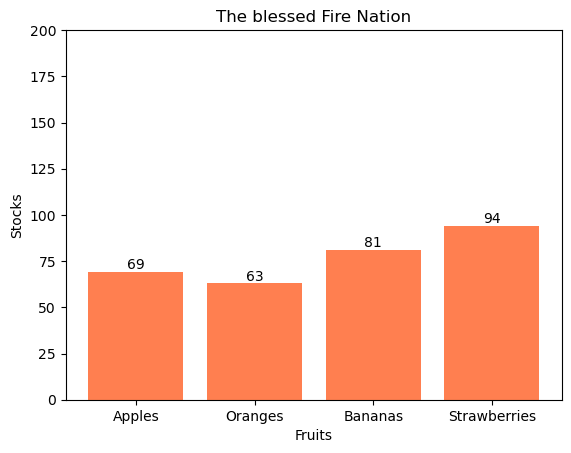

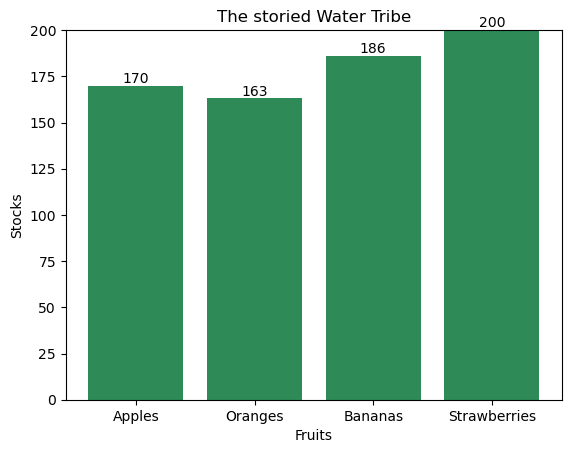

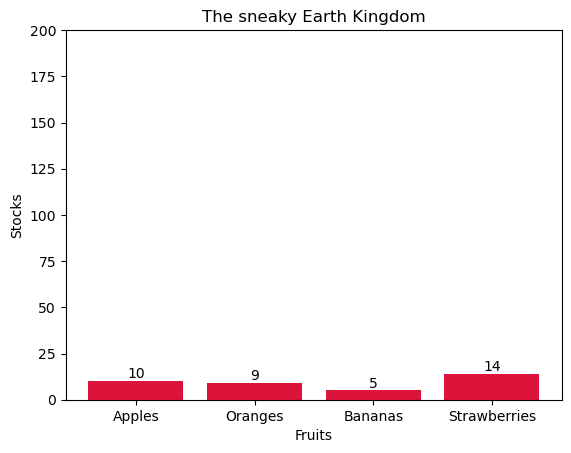

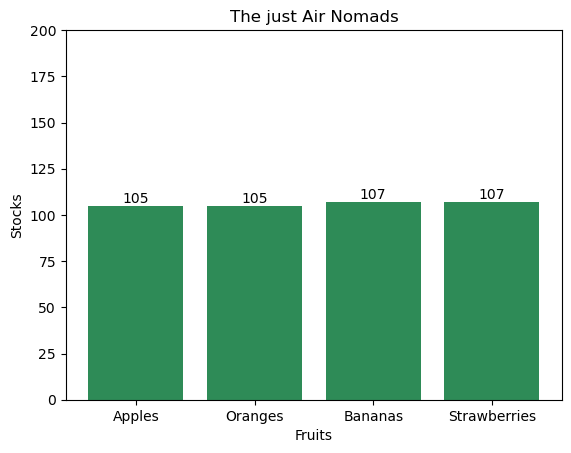

In [60]:
# try it yourself after implementing
fire_nation.visualize_resources()
water_tribe.visualize_resources()
earth_kingdom.visualize_resources()
air_nomads.visualize_resources()

**7)****

* The organical_growth() method

This method takes no user provided arguments. It represents the fact that each faction has natural farms that grow fruits.

When this method is called by a faction, it should randomly increase the amound of each, individually, by a seperate random amount ranging from 1 to 5.

Remember that the maximum amount of each fruit, individually, is 200. Make sure that the amount is unable to increase beyond that.

Also, print out the changes that are happening. For example:

    if current_amount_of_oranges < 200:
    
        Glorious {faction_name} has harvested 4 oranges, to a new total of 164!

    if current_amount_of_oranges == 200:

        Glorious {faction_name} is already at maximum capacity for oranges!
    
        

In [73]:
# try it yourself after implementing
fire_nation.organical_growth()
water_tribe.organical_growth()
earth_kingdom.organical_growth()
air_nomads.organical_growth()


Glorious Fire Nation has harvested 3 oranges, to a new total of 127!
Glorious Water Tribe has harvested 1 strawberries, to a new total of 101!
Glorious Earth Kingdom has harvested 3 oranges, to a new total of 11!
Glorious Air Nomads has harvested 4 oranges, to a new total of 105!


**8)*****

* The __mul__() method

Here we go! We're going to overload the * operator to represent an attack on a rival faction!

    When an attack occurs, there will be an 70% probability of it being successful. 

If the attack fails, the defender is considered to have defended skillfully and nothing else happens.

    A successful attack will transfer, to the attacking faction, 20% of all remaining fruits (of all sorts) from the defending rival faction.

In addition, if an attack is successful, there is an independent 10% probability of it being CRITICAL. This will increase the percentage looted to 40%, instead of 20%

    Importantly, if the defending faction has no resources left once the attack starts, the aggressor should be prompted to choose another target since there is no GLORY in kicking down on an opponent already brought to its knees.

Remember that the total number of each fruit a faction can hold can't increase beyond 200. If more is looted by the attacker  can be held by the attack, we consider those abundant fruits 'casaulties of war'. Meaning, the defending faction still loses them, but they are simply lost in the chaos and not added to the attackers stockpile.

    Additionally, if for example a faction only has a few remaining (say ~5) fruits remaining of any given kind - implement some functionality for a 'humilitating blow' whereby the attacker steals all remaining fruits. This is needed since only looting percentages will make it impossible to nullify a factions resources. 

For each of the possible actions described above, print out some cool texts so that the user is able to clearly follow the silliness!

    As an extra, you can first import time, and then add time.sleep(2) after each print, to create some suspense.

In [77]:
# try it yourself after implementing
water_tribe * fire_nation

The mighty Water Tribe launches an attack against the deluded Fire Nation!
The mighty Fire Nation bravely defend themselves against the sneaky Water Tribe.

Water Tribe is GODLIKE! Their position is super dominant!
The proud Fire Nation is VERY eager to toss some oranges! Where are the opponents?!


**9) BONUS**

* The trade_offer() method

This method allows for the given faction to offer up a trade of resources to another faction.

It should take 5 arguments: 

1. The faction that is being offered the trade
2. The resource (fruit) that is being offered
3. The amount of said resource that is being offered
4. The resource (fruit) that is being requested in return
5. The amount of said resource that is being requested in return

The method should first check if both factions have sufficient amounts of respective resource. It should also check that no faction exceeds the 200 resources limit, should a trade go through.

If any of the restrictions above is violated, the trade request should be aborted and a suitable message printed.

If the conditions are favourable for an exchange, i.e., none of the restrictions are violated, then the trade should be accepted, resources exchanged and a suitable message printed. 

Importantly, the exchange of resources should be reflected in the actual intentories of the two factions.

We can have some more fun by addic more dynamic! 

Implement functionality so that if the the amount of resources is *less* than the amount of resources requested, the target faction gets **incredibly insulted** an launches an instant attack! This attack is simply the one defined by the __mul__()-method we defined earlier. 




In [66]:
# try it yourself after implementing
fire_nation.trade_offer(water_tribe, 'strawberries', 5, 'bananas', 4)

The blessed Fire Nation offer 5 strawberries to the mighty Water Tribe, in exchange for 4 bananas.
The trade between the eternal Fire Nation and the stalwart Water Tribe is successful and a tiding of peace to come!
The Water Tribe hands over 4 bananas to the Fire Nation in exchange for 5 strawberries in the spirit of good will.
